### 1. Install prerequisites: Anaconda, Git, and NVIDIA

https://github.com/microsoft/CameraTraps/blob/main/megadetector.md#run_detectorpy

In [ ]:
!wget https://repo.anaconda.com/archive/Anaconda3-2022.10-Linux-x86_64.sh
!bash Anaconda3-2022.10-Linux-x86_64.sh
!source .bashrc

Download image from lila

In [ ]:
!conda install -c conda-forge gsutil
!mkdir animl
!gsutil -m cp -r dir gs://public-datasets-lila/channel-islands-camera-traps/images/ .

### 2. Download the MegaDetector model(s)

Download one or more MegaDetector model files (MDv5a, MDv5b, and/or MDv4) to your computer. These instructions will assume that you have downloaded MegaDetector to a folder called "c:\megadetector", but if you put it somewhere else, that's fine, just be sure to change it in the steps below that point to a model file. If you don't care where it goes, and you don't know yet which version you want to use, you'll have an easier time working through these instructions if you download MDv5a to a folder called "c:\megadetector", i.e. if the model file lives at "c:\megadetector\md_v5a.0.0.pt".

The instructions below will assume that you are using MDv5a; one step will be slightly different for MDv4, but we'll call that out when we get there.

In [ ]:
!wget https://github.com/microsoft/CameraTraps/releases/download/v5.0/md_v5a.0.0.pt
!wget https://github.com/microsoft/CameraTraps/releases/download/v5.0/md_v5b.0.0.pt
!wget https://lilablobssc.blob.core.windows.net/models/camera_traps/megadetector/md_v4.1.0/md_v4.1.0.pb

### 3. Clone the relevant git repos and add them to your path, and set up your Python environment

Linux instructions for git/Python (USF provide GPU for us and that is Linux environment)
If you have installed Anaconda on Linux, you are probably always at an Anaconda prompt; i.e., you should see "(base)" at your command prompt. Assuming you see that, the first time you set all of this up, and run:



In [ ]:
!mkdir ~/git
!cd ~/git
!git clone https://github.com/ecologize/yolov5/
!git clone https://github.com/Microsoft/cameratraps
!git clone https://github.com/Microsoft/ai4eutils
!cd ~/git/cameratraps
!conda env create --file environment-detector.yml
!conda activate cameratraps-detector
!export PYTHONPATH="$PYTHONPATH:$HOME/git/cameratraps:$HOME/git/ai4eutils:$HOME/git/yolov5"

If you want to use MDv4, there's one extra setup step (this will not break your MDv5 setup, you can run both in the same environment):

In [ ]:
!pip install tensorflow

Your environment is set up now! In the future, whenever you start a new shell, you just need to do:


In [3]:
!cd ~/git/cameratraps
!conda activate cameratraps-detector
!export PYTHONPATH="$PYTHONPATH:$HOME/git/cameratraps:$HOME/git/ai4eutils:$HOME/git/yolov5"


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




### 4. Hooray, we finally get to run MegaDetector!

run_detector.py

To test MegaDetector out on small sets of images and get super-satisfying visual output, we provide run_detector.py, an example script for invoking this detector on new images. This isn't how we recommend running lots of images through MegaDetector (see run_detector_batch.py below for "real" usage), but it's a quick way to test things out. Let us know how it works on your images!

In [15]:
!python ~/git/cameratraps/detection/run_detector.py ~/git/cameratraps/md_v5a.0.0.pt --image_file ~/git/cameratraps/test_images/d5898449.jpg

Running detector on 1 images...
PyTorch reports 4 available CUDA devices
GPU available: True
Using PyTorch version 1.13.1+cu117
Fusing layers... 
Model summary: 574 layers, 139990096 parameters, 0 gradients
Sending model to GPU
Loaded model in 3.56 seconds
Fusing layers... 
Model summary: 574 layers, 139990096 parameters, 0 gradients
Sending model to GPU
Loaded model in 0.96 seconds
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 39.73it/s]
On average, for each image,
- loading took 0 seconds, std dev is not available
- inference took 0.02 seconds, std dev is not available


In [ ]:
!python detection/run_detector_batch.py ~/git/cameratraps/md_v5a.0.0.pt ~/git/cameratraps/test_images/001 --output_relative_filenames ~/git/cameratraps/test_output/test_output_001.json  --recursive --checkpoint_frequency 10000

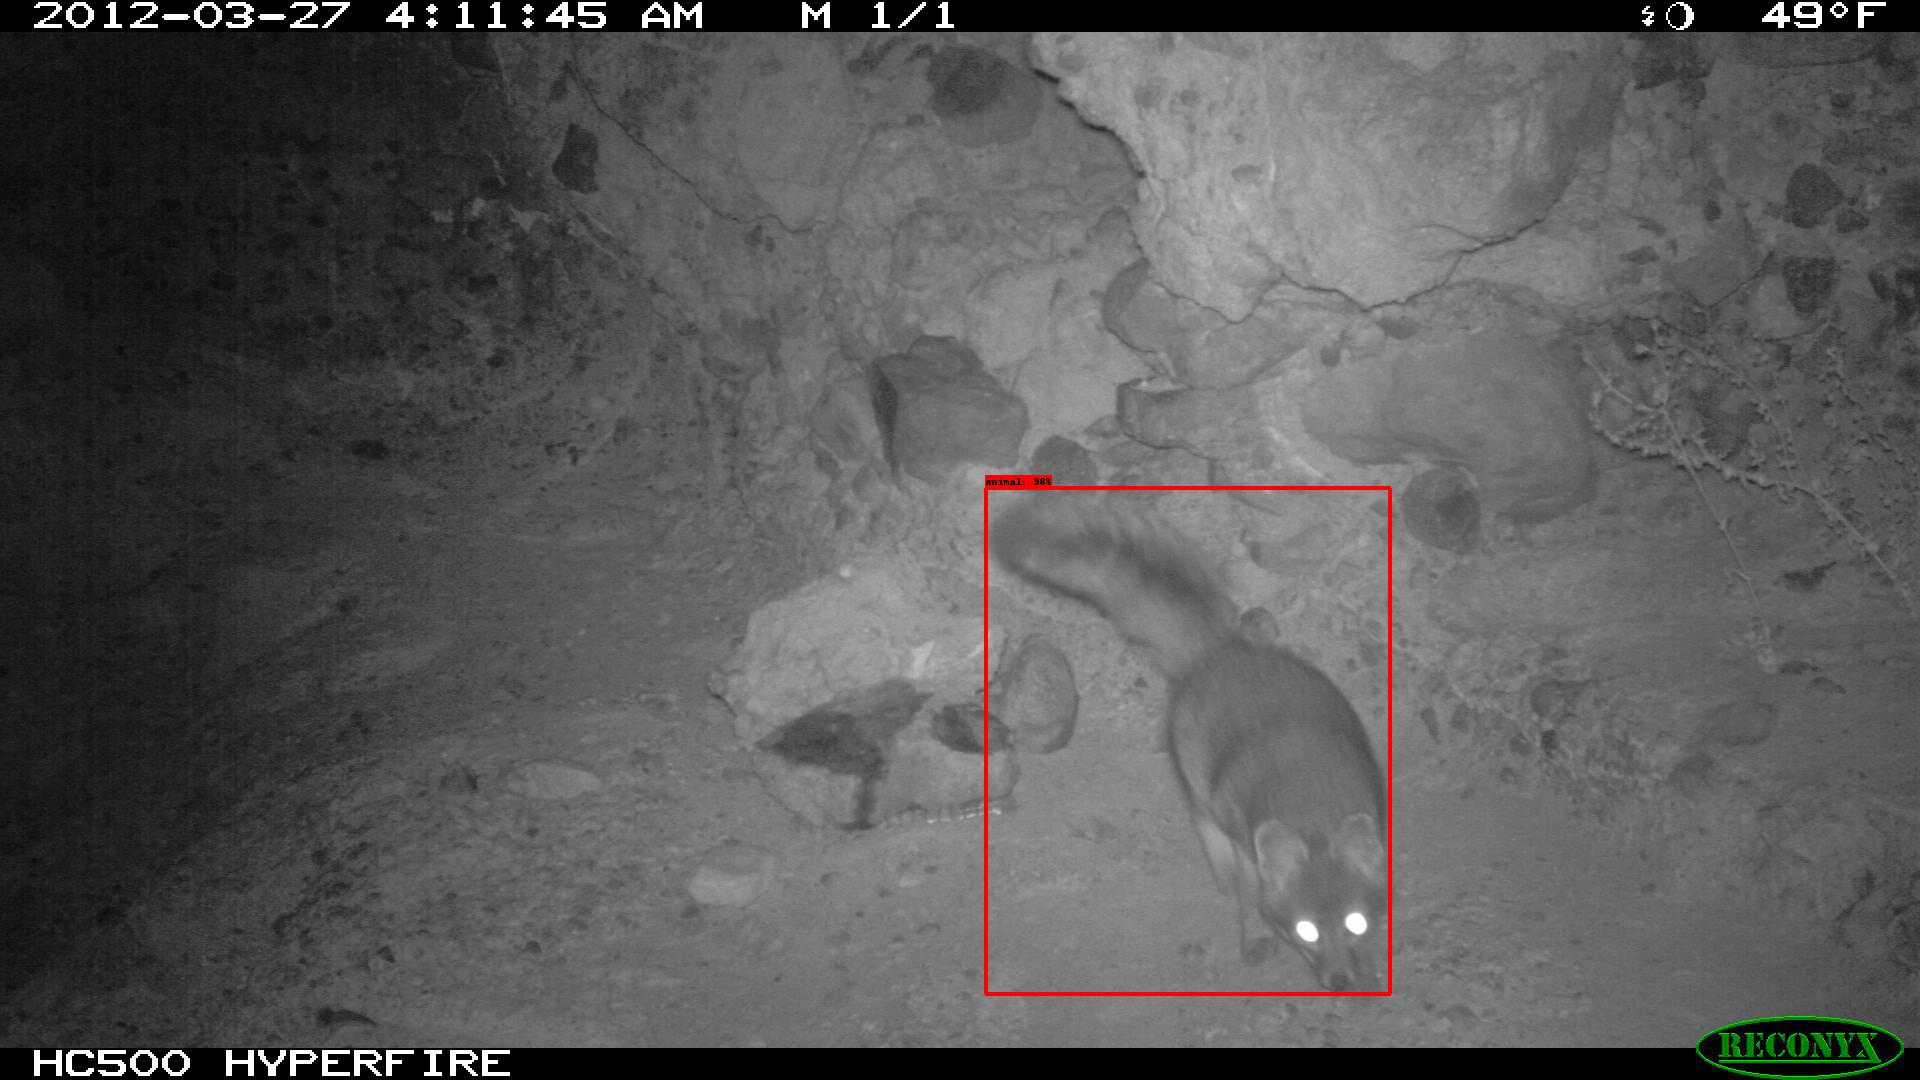

In [18]:
from IPython.display import Image
Image(filename='./git/cameratraps/test_images/001/018_detections.jpg') 

run_detector_batch.py

To apply this model to larger image sets on a single machine, we recommend a different script, run_detector_batch.py. This outputs data in the same format as our batch processing API, so you can leverage all of our post-processing tools. The format that this script produces is also compatible with Timelapse.

If you are running very large batches, we strongly recommend adding the --checkpoint_frequency option to save checkpoints every N images (you don't want to lose all the work your GPU has done if your computer crashes!). 10000 is a good value for checkpoint frequency; that will save the results every 10000 images. This is what we've used in the example above.

To use this script on Linux/Mac, when you open a new Anaconda prompt, don't forget to do this:

In [ ]:
!cd ~/git/cameratraps
!conda activate cameratraps-detector
!export PYTHONPATH="$PYTHONPATH:$HOME/git/cameratraps:$HOME/git/ai4eutils:$HOME/git/yolov5"

Then you can run the script like this:

In [ ]:
!python ~/git/cameratraps/detection/run_detector_batch.py ~/git/cameratraps/md_v5a.0.0.pt ~/git/cameratraps/test_images/loc-h500ee05127658 --output_relative_filenames ~/git/cameratraps/test_output/test_output_h500ee05127658.json  --recursive --checkpoint_frequency 10000

In [20]:
from IPython.display import JSON
JSON('./git/cameratraps/test_output/test_output_001.json', expanded=False)


<IPython.core.display.JSON object>